## **What are RNNs**


A Recurrent Neural Network (RNN) is a type of neural network designed for processing **sequential data**.

Unlike traditional feedforward networks, which process inputs independently,RNNs maintain a **memory** of previous inputs by using **loops in their architecture**.

This makes them well-suited for tasks where **context and order matter**, such as time series forecasting, speech recognition and text generation.


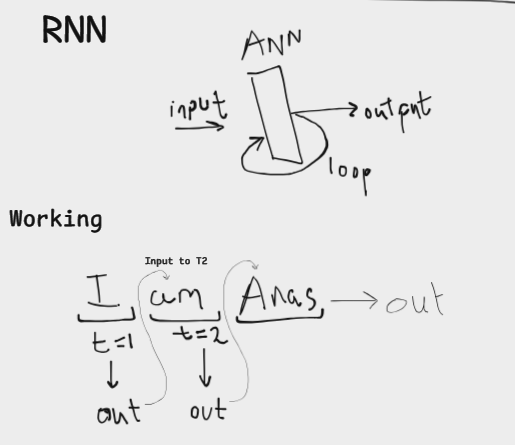


- Rnn Process the data i.e this sentence word by word.

- at time `t=1` they will process 1st word and give output.

- at t2 process word 2 but include the output of t1 and soo on.

---


The main Challenge is we dont know english we have to convert those wors to numbers.

Multiple Methods:

1. One Hot Encoding.
2. Embeddings : In this we convert words as **vector**


To maintiain Consistency we also Send one input to first time stamp.

These will be set of random numbers.

So each time stamp we are processing one word along with previous output.


This whole process is called **Unfolding Threshold**


## **Steps**

Load Data set

---

Convert data to Numbers. That means convert them to embeddings.

We cannot directly convert them to embeddings first we have to perform following steps.

- Form a Vocabolary. (All unique words in dataset). Store vocab in mappings with along its index.

- Provide index to sentence with referencing the index of Vocab.

- Send this sentence indexes to embedding models. Which will see those index and convert them to vectors.

---

Build the Architecture of RNN

---

Train Model on Dataset

---

Prediction


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/Unique_QA_Dataset.csv")
df.head()

,question,answer
0,What is the capital of France?,Paris
1,What is the capital of Germany?,Berlin
2,Who wrote 'To Kill a Mockingbird'?,Harper-Lee
3,What is the largest planet in our solar system?,Jupiter
4,What is the boiling point of water in Celsius?,100


In [ ]:
df.shape

(428, 2)

In [ ]:
df["question"].nunique()

420

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  428 non-null    object
 1   answer    428 non-null    object
dtypes: object(2)
memory usage: 6.8+ KB


In [ ]:
df[df["question"].duplicated()]

,question,answer
153,Who discovered penicillin?,Alexander-Fleming
209,Which country is known for the Eiffel Tower?,France
270,Who discovered the electron?,J-J-Thomson
300,What is the main ingredient in guacamole?,Avocado
327,Who discovered the electron?,J-J-Thomson
338,What is the main gas in Mars' atmosphere?,Carbon-Dioxide
386,Who invented the printing press?,Johannes-Gutenberg
392,Which animal is the largest reptile?,Saltwater-Crocodile


In [ ]:
# df.drop_duplicates(inplace=True)

In [ ]:
df[df["question"].duplicated()].count()

,0
question,1
answer,1


In [ ]:
df.shape

(421, 2)

In [ ]:
df.sample(10)

,question,answer
366,Which country is famous for the Andes?,Peru
376,Which animal is the largest flying bird?,Wandering-Albatross
73,Which country is famous for its kangaroos?,Australia
319,Who invented the safety razor?,King-Camp-Gillette
268,Which animal is the largest marsupial?,Red-Kangaroo
14,Who is the author of '1984'?,George-Orwell
130,What is the largest lake in Africa?,Lake-Victoria
117,What is the capital of Thailand?,Bangkok
290,Who painted 'Water Lilies'?,Claude-Monet
167,What is the capital of Iraq?,Baghdad


## Convert the Dataset to Numbers


**Tokenize**

Seperate each words. There are bunch of techniques which are used to tokenize the words such as WordTokenizer, Word2Vec etc.

But here we will do it manually to practice using strings methods in Python.

- split
- lowercase
- handle punctuations and all


In [ ]:
# Tokenize


def tokenize(text):
    # lower
    text = text.lower()

    # punctuations, replace with nothing
    text = text.replace("?", "")
    text = text.replace("'", "")

    return text.split()

In [ ]:
tokenize("what is the capital of France?")

['what', 'is', 'the', 'capital', 'of', 'france']

We have Remove "-" replacement from here because We dont want multiple tensors for our answer we just want one only in answer.


**Vocabulary**

Store all unique words in dictionary.

- we can initialize the dictionary with a word `<UNK>` means unkown with index:0

- We will take one by one all rows and see if anything unique is there or not. Basically check if a token in dictionary or not if not then add with Index of the current lenght.


In [ ]:
vocab = {"<UNK>": 0}

In [ ]:
def build_vocab(row):
    tokenized_question = tokenize(row["question"])
    tokenized_answer = tokenize(row["answer"])

    # print(tokenized_question,tokenized_answer)

    # Combine them into single list
    merged_tokens = tokenized_question + tokenized_answer

    # print(merged_tokens)

    # Now iterate over this row of list and check if each token is there in dictionary or not.
    # if not then add it with its index
    for token in merged_tokens:
        if token not in vocab:
            vocab[token] = len(vocab)


In [ ]:
# Apply this function on Entire dataset to create Vocab and we have to apply ROw WIse

df.apply(build_vocab, axis=1)

,0
0,None
1,None
2,None
3,None
4,None
...,...
423,None
424,None
425,None
426,None


In [ ]:
vocab

{'<UNK>': 0,
 'what': 1,
 'is': 2,
 'the': 3,
 'capital': 4,
 'of': 5,
 'france': 6,
 'paris': 7,
 'germany': 8,
 'berlin': 9,
 'who': 10,
 'wrote': 11,
 'to': 12,
 'kill': 13,
 'a': 14,
 'mockingbird': 15,
 'harper-lee': 16,
 'largest': 17,
 'planet': 18,
 'in': 19,
 'our': 20,
 'solar': 21,
 'system': 22,
 'jupiter': 23,
 'boiling': 24,
 'point': 25,
 'water': 26,
 'celsius': 27,
 '100': 28,
 'painted': 29,
 'mona': 30,
 'lisa': 31,
 'leonardo-da-vinci': 32,
 'square': 33,
 'root': 34,
 '64': 35,
 '8': 36,
 'chemical': 37,
 'symbol': 38,
 'for': 39,
 'gold': 40,
 'au': 41,
 'which': 42,
 'year': 43,
 'did': 44,
 'world': 45,
 'war': 46,
 'ii': 47,
 'end': 48,
 '1945': 49,
 'longest': 50,
 'river': 51,
 'nile': 52,
 'japan': 53,
 'tokyo': 54,
 'developed': 55,
 'theory': 56,
 'relativity': 57,
 'albert-einstein': 58,
 'freezing': 59,
 'fahrenheit': 60,
 '32': 61,
 'known': 62,
 'as': 63,
 'red': 64,
 'mars': 65,
 'author': 66,
 '1984': 67,
 'george-orwell': 68,
 'currency': 69,
 'unit

In [ ]:
# check vocab
print(len(vocab))

951


**Convert Data to embeddings based on these vocab**


Function will recieve 2 inputs.

Sentence, Vocabulary on which basis the conversion will happen.

- we will create list of index for text recieved.

- check if the tokens of recieved text are present in vocabulary or not.

- if present then store the index to the list.

- If not call UNK from vocab i.e store 0 as index.


In [ ]:
def text_to_indices(text, vocab):
    indexed_text = []

    for token in tokenize(text):
        if token in vocab:
            indexed_text.append(vocab[token])
        else:
            indexed_text.append(vocab["<UNK>"])

    return indexed_text

In [ ]:
text_to_indices("Who is Salman", vocab)

[10, 2, 0]

## Now that everything is Done. Start Building


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset

**Dataset Class**


In [ ]:
class QADataset(Dataset):
    # initialize with data and vocab
    def __init__(self, df, vocab):
        self.df = df
        self.vocab = vocab

    # return rows number
    def __len__(self):
        return self.df.shape[0]

    # Get the item with index given
    def __getitem__(self, index):
        # This will give in english row
        # Thus convert it to indices
        num_question = text_to_indices(self.df.iloc[index]["question"], self.vocab)
        num_answer = text_to_indices(self.df.iloc[index]["answer"], self.vocab)

        # Convert them into tensors
        tensor_question = torch.tensor(num_question)
        tensor_answer = torch.tensor(num_answer)

        return tensor_question, tensor_answer

In [ ]:
# create dataset object

dataset = QADataset(df, vocab)

In [ ]:
dataset[0]

(tensor([1, 2, 3, 4, 5, 6]), tensor([7]))

**DataLoader**


In [ ]:
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [ ]:
for q, a in dataloader:
    print(q, a[0])

tensor([[  1,   2,   3,   4,   5, 236, 237]]) tensor([238])
tensor([[ 10, 140,   3, 141, 142,  12, 530,   3, 693,   5, 736, 124]]) tensor([454])
tensor([[  1,   2,   3, 146, 147,  19, 595]]) tensor([596])
tensor([[ 42, 117, 118,   3, 119,  94, 447]]) tensor([161])
tensor([[  1,   2,   3,  17, 658,  19,   3,  45]]) tensor([659])
tensor([[  1,   2,   3,  17, 607,  19,   3,  45]]) tensor([608])
tensor([[  1,   2,   3,  24,  25,   5, 617,  19,  27]]) tensor([618])
tensor([[ 10,  29, 510]]) tensor([511])
tensor([[  1,   2,   3,  17, 757, 758,  19,   3,  45]]) tensor([759])
tensor([[ 42, 137,   2,  62,  39,   3, 480, 481, 482]]) tensor([99])
tensor([[  1,   2,   3,  17, 478,  19, 361]]) tensor([827])
tensor([[ 10,  11,   3, 574, 575]]) tensor([576])
tensor([[ 10,  29,   3, 829,   5, 462]]) tensor([830])
tensor([[  1,   2,   3,  37,  38,  39, 779]]) tensor([780])
tensor([[ 10, 140,   3, 141, 142,  12, 530,   3, 236, 531]]) tensor([532])
tensor([[  1,   2,   3,   4,   5, 752]]) tensor([753])
t

## **Create RNN**


Here is the Architecture


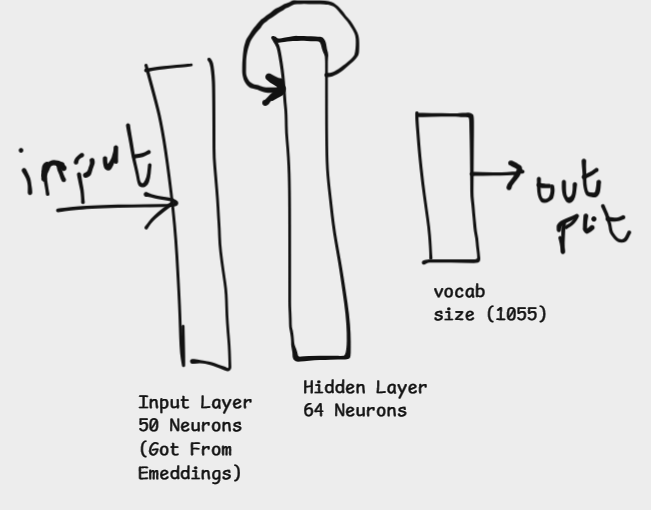


- **50 Neuron in Input Layer:** We will convert the dimension of our embeddings to 50.

- Embeddings will also be be generated using our Nueral Network Only.

- One Hidden Layer with 64 neurons with self feedback Loop.--> we have modify this to 128 as to match with 1055 neurons

- Final Layer with **1055** neurons.
  Why 1055 because corresponding to each word in vocabulary. There is one neuron for each word.

- So there will be a probability against each nueron and whichever have the highest probability that will be our answer.


In [ ]:
import torch.nn as nn

In [ ]:
class MyRNN(nn.Module):
    # constructor
    # It only need vocabulary size
    def __init__(self, vocab_size):
        super().__init__()

        # embedding layer
        # size & embedding vector
        self.embedding = nn.Embedding(vocab_size, embedding_dim=50)

        # rnn layer, input dim and output, batchFirst
        self.rnn = nn.RNN(50, 128, batch_first=True)

        # output layer
        self.fc = nn.Linear(128, vocab_size)

    # forward pass
    def forward(self, question):
        # create embeddings
        embedded_question = self.embedding(question)

        # pass the question to RNN
        # This will return 2 things which we have seen below
        hidden_state, final_state = self.rnn(embedded_question)

        # Send final state to fully connected Layer
        # squeeze explaination below
        output = self.fc(final_state.squeeze(0))

        return output

Now in this we can see that we are not wrapping this inside Sequential Container as we were doing before.

---

Now that we have seen we have to write manually about how to perform forward pass.

- Question ==>> Embedding
- Embedding ==>> RNN --> all_hidden_state, final_output
- final_output ==>> Fully Connected Layer --> Result


**See Below To Understand why we are not using Sequential Containers.**


In [ ]:
# one sample question
dataset[0][0]

tensor([1, 2, 3, 4, 5, 6])

In [ ]:
# create a testing embedding for it
x = nn.Embedding(951, embedding_dim=50)

In [ ]:
x(dataset[0][0])

tensor([[ 9.1480e-01,  1.2891e+00, -1.2694e+00, -1.7225e+00,  6.6395e-01,
         -1.7403e+00, -5.4209e-01, -5.5073e-01,  1.7501e-02, -8.8148e-01,
         -1.6279e-01,  8.0233e-01, -1.4969e+00, -7.2997e-01,  9.9614e-01,
          1.2228e-01,  5.3405e-01, -1.5368e-01,  1.6433e-01,  1.2086e-01,
          1.3831e-01,  2.2798e-01,  4.7502e-01, -2.1097e-01, -8.3035e-01,
         -3.4317e+00,  1.2502e+00, -1.5363e+00,  6.5845e-01,  1.6058e-01,
          5.3924e-02, -1.1979e-01, -1.5928e-02,  6.4201e-01, -1.0811e-01,
          1.5011e+00,  9.1813e-01,  9.9705e-01, -1.5078e-01, -5.6205e-02,
         -1.3002e-01,  4.6623e-01,  1.1348e+00, -2.4378e-01,  5.8128e-01,
          1.5034e+00, -9.7592e-01,  1.1572e+00, -1.2788e+00,  1.3944e-01],
        [-5.2029e-01, -1.1779e-01,  7.3757e-01, -1.6841e+00, -4.5880e-01,
         -1.9114e+00,  4.4569e-01, -3.3341e+00,  2.0637e+00,  3.3418e-01,
          1.3892e+00, -1.3275e+00, -6.2587e-01, -4.1265e-01, -3.7781e-01,
          2.6702e-01, -5.2698e-01,  1

In [ ]:
x(dataset[0][0]).shape

torch.Size([6, 50])

**So first layer is converting the recieving data into 50 dimension embedding vector.**

Now if we create RNN layer then see what happens


In [ ]:
y = nn.RNN(50, 128)

In [ ]:
a = x(dataset[0][0])

In [ ]:
y(a)

(tensor([[-4.6351e-01, -1.1700e-01, -4.4550e-01,  2.2414e-01, -5.2251e-01,
           5.1497e-01,  2.7454e-01,  4.0869e-01, -2.7252e-01, -1.9609e-01,
           2.0426e-01, -1.0526e-02,  2.8114e-02, -3.6519e-01, -4.3674e-01,
           2.3846e-01,  6.5751e-02,  3.8634e-01, -6.0925e-01, -4.6125e-01,
          -1.3491e-01,  2.4479e-01,  2.8238e-01,  7.7669e-02, -6.2888e-02,
           3.2312e-01,  3.4148e-02,  5.1282e-02,  3.2324e-01, -6.2779e-02,
           2.6403e-01, -2.5301e-01, -1.2165e-01, -4.9208e-01, -3.0300e-02,
           5.7549e-01, -2.3819e-01,  1.7693e-01, -1.3174e-01,  2.1946e-01,
           2.4865e-01, -9.9100e-02, -2.1111e-01,  1.8639e-01,  5.8194e-01,
           1.2019e-01,  4.4335e-01,  1.8000e-01, -4.1284e-02, -1.4164e-01,
          -3.9700e-02, -2.5031e-01, -8.0383e-01, -2.9802e-01, -5.2917e-01,
           1.2577e-01, -2.4041e-01,  7.1780e-02, -4.2361e-01, -1.1493e-01,
           5.9448e-01, -5.3098e-01, -4.7139e-01,  3.4811e-02, -5.4439e-01,
          -2.6321e-01, -3

**Now here we have a tuple of 2 tensors**

What does that means.

- First index is Hidden States of the RNN.

- Second is the result of that incoming data.

Here RNN gives two outputs. 1 is combination of all the outputs till now known as hidden state.

And 2nd is the actual output of that pass.


In [ ]:
# This will be Hidden state because it has combination of all the outputs in it.

y(a)[0]

tensor([[-4.6351e-01, -1.1700e-01, -4.4550e-01,  2.2414e-01, -5.2251e-01,
          5.1497e-01,  2.7454e-01,  4.0869e-01, -2.7252e-01, -1.9609e-01,
          2.0426e-01, -1.0526e-02,  2.8114e-02, -3.6519e-01, -4.3674e-01,
          2.3846e-01,  6.5751e-02,  3.8634e-01, -6.0925e-01, -4.6125e-01,
         -1.3491e-01,  2.4479e-01,  2.8238e-01,  7.7669e-02, -6.2888e-02,
          3.2312e-01,  3.4148e-02,  5.1282e-02,  3.2324e-01, -6.2779e-02,
          2.6403e-01, -2.5301e-01, -1.2165e-01, -4.9208e-01, -3.0300e-02,
          5.7549e-01, -2.3819e-01,  1.7693e-01, -1.3174e-01,  2.1946e-01,
          2.4865e-01, -9.9100e-02, -2.1111e-01,  1.8639e-01,  5.8194e-01,
          1.2019e-01,  4.4335e-01,  1.8000e-01, -4.1284e-02, -1.4164e-01,
         -3.9700e-02, -2.5031e-01, -8.0383e-01, -2.9802e-01, -5.2917e-01,
          1.2577e-01, -2.4041e-01,  7.1780e-02, -4.2361e-01, -1.1493e-01,
          5.9448e-01, -5.3098e-01, -4.7139e-01,  3.4811e-02, -5.4439e-01,
         -2.6321e-01, -3.2030e-01,  5.

In [ ]:
y(a)[0].shape

torch.Size([6, 128])

In [ ]:
# This is the actual Output

y(a)[1]

tensor([[ 3.3303e-01,  6.2945e-02, -4.4157e-02,  4.4485e-01,  9.8342e-02,
          4.8051e-01,  3.1184e-01, -1.0573e-01,  7.4859e-02,  2.2267e-01,
          1.4134e-01,  3.7578e-01, -6.3427e-01,  1.4056e-01, -7.4775e-02,
         -5.0111e-01,  5.4983e-01,  5.3812e-01,  4.4079e-01,  1.4667e-01,
         -9.7725e-02,  7.1328e-01, -2.7732e-01,  4.7298e-01,  1.6574e-01,
         -6.6557e-01,  4.8732e-01, -8.7426e-02,  2.1022e-02, -5.5415e-02,
          2.9750e-02,  1.7083e-01, -2.1265e-02, -1.8108e-04,  7.0369e-01,
         -4.8427e-02,  5.2533e-01, -2.4326e-01, -6.4794e-01,  1.4236e-01,
          6.2053e-01, -5.3598e-01, -4.5023e-01, -3.6218e-01,  1.7905e-01,
         -1.7723e-01, -8.2531e-01, -3.1075e-01,  2.4124e-01, -6.4633e-01,
          4.6786e-01, -6.1114e-01, -5.2713e-02,  1.3000e-01,  3.4472e-02,
          2.5311e-01,  2.7500e-01,  5.0169e-01,  4.3517e-01, -2.5341e-01,
          1.8856e-01, -3.9518e-02,  5.6102e-01, -6.8782e-01, -7.7274e-02,
         -3.7692e-01, -3.5565e-02,  1.

In [ ]:
y(a)[1].shape

torch.Size([1, 128])

In [ ]:
# final output
b = y(a)[1]

In [ ]:
z = nn.Linear(128, 951)

In [ ]:
# This is the probability of all vocabs index

z(b)

tensor([[ 1.3231e-02, -5.4144e-01, -3.8748e-01,  3.4451e-02,  4.8199e-02,
          1.7869e-02, -6.1889e-01, -3.2449e-01,  1.4363e-02, -3.5112e-01,
         -7.7501e-02, -1.1596e-01,  1.6782e-01,  8.2962e-02, -1.9417e-01,
         -2.5691e-01, -9.1642e-02,  1.8519e-01,  3.1806e-02, -7.8176e-02,
          2.2253e-02,  2.1585e-01,  1.2933e-01, -2.9090e-01, -1.7814e-01,
         -6.8609e-02, -3.5216e-02, -9.4400e-02,  5.0084e-03,  1.8258e-01,
         -6.2174e-01,  1.6428e-01, -2.8748e-02, -2.4790e-01,  3.1961e-01,
          9.0561e-02, -1.4948e-01, -9.5823e-02, -6.6631e-02,  7.5234e-02,
          4.6609e-02,  1.1250e-01,  4.8215e-01, -1.7044e-02,  2.2092e-01,
          4.2020e-01,  6.6147e-02, -3.1998e-01,  4.1594e-02,  2.0315e-01,
          6.3703e-02,  2.8565e-01,  2.1763e-02, -3.2007e-01, -5.2066e-01,
          2.6220e-01, -1.2123e-01, -3.3940e-01, -8.1090e-03, -2.4084e-01,
          7.4705e-02,  7.5050e-02,  3.4117e-02, -4.7528e-02,  9.9698e-02,
          2.8119e-03,  2.0486e-01,  4.

In [ ]:
z(b).shape

torch.Size([1, 951])

**Now Because we are Recieving Hidden States and Output Thus we cannot use Sequencial Container because it does not allow two outputs**


In [ ]:
"""
For Debugging
"""

x = nn.Embedding(951, embedding_dim=50)
# y = nn.RNN(50, 64)
y = nn.RNN(50, 128, batch_first=True)
z = nn.Linear(128, 951)

print("shape of 1st question:", dataset[0][0].shape)

# form a batch of one single question
a = dataset[0][0].reshape(1, 6)
print("shape of a:", a.shape)
b = x(a)
print("shape of b:", b.shape)
c, d = y(b)
print("shape of c:", c.shape)

# Now here our final output should be single value not all hidden states.
# it should be 1,1,64
"""
Here internally sequence & Batch are getting swap.
So we have to specify that 1st values is always batch.
So use batch_first.
"""
print("shape of d:", d.shape)

# We have to remove the first dimension that is batch from it so use squeeze.
# e = z(d)
e = z(d.squeeze(0))

print("shape of e:", e.shape)

shape of 1st question: torch.Size([6])
shape of a: torch.Size([1, 6])
shape of b: torch.Size([1, 6, 50])
shape of c: torch.Size([1, 6, 128])
shape of d: torch.Size([1, 1, 128])
shape of e: torch.Size([1, 951])


**Parameters**


In [ ]:
learning_rate = 0.001
epochs = 200

In [ ]:
model = MyRNN(len(vocab))

In [ ]:
# Loss
criteria = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

**Training Loop**


In [ ]:
"""
Dont Run this cell.
This code is here to see the error and solve it
"""

for epoch in range(epochs):
    total_loss = 0

    for question, answer in dataloader:
        # clear gradients
        optimizer.zero_grad()

        # forward pass
        output = model.forward(question)
        print(output.shape)

        # loss calculate (predicted, original)
        # Here we are getting error because our answer is 2d we have seen that during hidden states so we have to make it 1d.
        # This is happeing because in RNN internally batch_size and dimension are getting swapped so we have to squeeze it to remove additional one.
        loss = criteria(output, answer[0])

        # calculate weight
        loss.backward()

        # weights update using Gradient
        optimizer.step()

        total_loss += loss

    print(f"Epoch:{epoch + 1}, Loss:{total_loss:4f}")

torch.Size([1, 5, 1055])


RuntimeError: Expected target size [1, 1055], got [1]

**Explaination of Above Error**

For loss the comparision is only possible when both the shapes are same.
Output -->(1,1055), But we are getting (1,3,1055).
Here the 1 in the starts represent the sequence and batch_size

Answer -->(1) One question has One Answer.

---

Setting `batch_first=True` in PyTorch RNNs is mainly for convenience and code readability, as it aligns the input and output tensor dimensions with the standard `(batch_size, sequence_length, features)` format that most other PyTorch layers expect. While the default `(sequence_length, batch_size, features)` is the native RNN convention and can offer better caching for sequences, `batch_first=True` simplifies data handling by eliminating the need for manual reshaping before and after passing data through other parts of the network


In [ ]:
# After Updating Above RNN Architecture

for epoch in range(epochs):
    total_loss = 0

    for question, answer in dataloader:
        # clear gradients
        optimizer.zero_grad()

        # forward pass
        output = model.forward(question)

        # loss calculate (predicted, original)
        loss = criteria(output, answer[0])

        # weights update using Gradient
        optimizer.step()

        total_loss += loss

    print(f"Epoch:{epoch + 1}, Loss:{total_loss:4f}")

Epoch:1, Loss:2878.410645
Epoch:2, Loss:2878.410645
Epoch:3, Loss:2878.411865
Epoch:4, Loss:2878.409912
Epoch:5, Loss:2878.411133
Epoch:6, Loss:2878.411621
Epoch:7, Loss:2878.409668
Epoch:8, Loss:2878.410889
Epoch:9, Loss:2878.411133
Epoch:10, Loss:2878.410400
Epoch:11, Loss:2878.411621
Epoch:12, Loss:2878.410645
Epoch:13, Loss:2878.410400
Epoch:14, Loss:2878.410156
Epoch:15, Loss:2878.411621
Epoch:16, Loss:2878.410889
Epoch:17, Loss:2878.409180
Epoch:18, Loss:2878.409668
Epoch:19, Loss:2878.410156
Epoch:20, Loss:2878.409424
Epoch:21, Loss:2878.410400
Epoch:22, Loss:2878.410645
Epoch:23, Loss:2878.412354
Epoch:24, Loss:2878.409912
Epoch:25, Loss:2878.409424
Epoch:26, Loss:2878.409180
Epoch:27, Loss:2878.409668
Epoch:28, Loss:2878.408691
Epoch:29, Loss:2878.411377
Epoch:30, Loss:2878.411377
Epoch:31, Loss:2878.409668
Epoch:32, Loss:2878.410645
Epoch:33, Loss:2878.409180
Epoch:34, Loss:2878.410645
Epoch:35, Loss:2878.412109
Epoch:36, Loss:2878.411133
Epoch:37, Loss:2878.409424
Epoch:38, 

## **Prediction**


**How does will it work**

- Our Question will become input.

- It will have (batch_size, num_of_words) suppose:(1,6).

- Model will give output.(1,951)

- Here 951 are probabilites for each word. But inreality it is not probabilties we call it **logit**.

- And On Logit we can apply softmax.

- Will Apply softmax and calculate probabilites. Now we will have (1,951) and all 951 will be probabilites.

- Now get the probabilites of each index to compare with threshold.

- If all the values are below threshold we will return "I Don't Know"


In [ ]:
def predict(model, question, threshold=0.4):
    # convert question to numbers
    numerical_question = text_to_indices(question, vocab)

    # tensor
    # Why unsqueeze(Because we have seen above we need to pass it with batch)
    question_tensor = torch.tensor(numerical_question).unsqueeze(0)

    # send to model
    output = model(question_tensor)

    # convert logits to probs
    probs = torch.nn.functional.softmax(output, dim=1)

    # find index of max prob
    value, index = torch.max(probs, dim=1)

    if value < threshold:
        print("I don't know")

    # when prob is grater then threshold.
    # get keys of vocabs and get the index postion value
    print(list(vocab.keys())[index])


In [ ]:
predict(model, "What is the capital of France?")

I don't know
whale-shark
